In [1]:
import pandas as pd
import scipy.stats
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('card transactions.csv', converters = {'Merchnum': lambda x: str(x)})

In [5]:
data.shape

(96753, 18)

In [7]:
data.nunique()

Recnum               96753
Cardnum               1645
Date                   365
Merchnum             13092
Merch description    13126
Merch state            227
Merch zip             4567
Transtype                4
Amount               34909
Fraud                    2
Unnamed: 10              0
Unnamed: 11              0
Unnamed: 12              0
Unnamed: 13              0
Unnamed: 14              0
Unnamed: 15              0
Unnamed: 16              0
Unnamed: 17              0
dtype: int64

In [9]:
data['Date'] = pd.to_datetime(data['Date'])

In [10]:
data.dtypes

Recnum                        int64
Cardnum                       int64
Date                 datetime64[ns]
Merchnum                     object
Merch description            object
Merch state                  object
Merch zip                   float64
Transtype                    object
Amount                      float64
Fraud                         int64
Unnamed: 10                 float64
Unnamed: 11                 float64
Unnamed: 12                 float64
Unnamed: 13                 float64
Unnamed: 14                 float64
Unnamed: 15                 float64
Unnamed: 16                 float64
Unnamed: 17                 float64
dtype: object

In [13]:
data.mode()

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
0,1,5.142148e+09,2010-02-28,930090121224,GSA-FSS-ADV,TN,38118.0,P,3.62,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96748,96749,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96749,96750,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96750,96751,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96751,96752,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
for field in data.columns[1:10]:
    print(data[str(field)].mode())

0    5142148452
Name: Cardnum, dtype: int64
0   2010-02-28
Name: Date, dtype: datetime64[ns]
0    930090121224
Name: Merchnum, dtype: object
0    GSA-FSS-ADV
Name: Merch description, dtype: object
0    TN
Name: Merch state, dtype: object
0    38118.0
Name: Merch zip, dtype: float64
0    P
Name: Transtype, dtype: object
0    3.62
Name: Amount, dtype: float64
0    0
Name: Fraud, dtype: int64


In [15]:
data['Fraud'].value_counts()

0    95694
1     1059
Name: Fraud, dtype: int64

In [17]:
data.head(5)

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
0,1,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,5142183973,2010-01-01,61003026333,SERVICE MERCHANDISE #81,MA,1803.0,P,31.42,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,5142131721,2010-01-01,4503082993600,OFFICE DEPOT #191,MD,20706.0,P,178.49,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,5142148452,2010-01-01,5509006296254,FEDEX SHP 12/28/09 AB#,TN,38118.0,P,3.62,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
data.tail(5)

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
96748,96749,5142276053,2010-12-31,3500000006160,BEST BUY 00001610,KY,41042.0,P,84.79,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96749,96750,5142225701,2010-12-31,8090710030950,MARKUS OFFICE SUPPLIES,OH,45248.0,P,118.75,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96750,96751,5142226486,2010-12-31,4503057341100,"TECH PAC, INC",OH,45150.0,P,363.56,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96751,96752,5142244619,2010-12-31,8834000695412,BUY.COM,CA,92656.0,P,2202.03,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96752,96753,5142243247,2010-12-31,9108347680006,STAPLES NATIONAL #471,NJ,7606.0,P,554.64,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
data.describe()

,Recnum,Cardnum,Merch zip,Amount,Fraud,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
count,96753.000000,9.675300e+04,92097.000000,9.675300e+04,96753.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,48377.000000,5.142202e+09,44706.596740,4.278857e+02,0.010945,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,27930.329635,5.567084e+04,28369.537945,1.000614e+04,0.104047,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,5.142110e+09,1.000000,1.000000e-02,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,24189.000000,5.142152e+09,20855.000000,3.348000e+01,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,48377.000000,5.142196e+09,38118.000000,1.379800e+02,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,72565.000000,5.142246e+09,63103.000000,4.282000e+02,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,96753.000000,5.142847e+09,99999.000000,3.102046e+06,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [173]:
data[data['Merch zip'] == 38118.0].count()

Recnum               11868
Cardnum              11868
Date                 11868
Merchnum             11868
Merch description    11868
Merch state          11868
Merch zip            11868
Transtype            11868
Amount               11868
Fraud                11868
Unnamed: 10              0
Unnamed: 11              0
Unnamed: 12              0
Unnamed: 13              0
Unnamed: 14              0
Unnamed: 15              0
Unnamed: 16              0
Unnamed: 17              0
dtype: int64

In [20]:
data.count()

Recnum               96753
Cardnum              96753
Date                 96753
Merchnum             96753
Merch description    96753
Merch state          95558
Merch zip            92097
Transtype            96753
Amount               96753
Fraud                96753
Unnamed: 10              0
Unnamed: 11              0
Unnamed: 12              0
Unnamed: 13              0
Unnamed: 14              0
Unnamed: 15              0
Unnamed: 16              0
Unnamed: 17              0
dtype: int64

In [34]:
round((data['Merch state'].count() / data['Recnum'].count()) * 100, 2)

98.76

In [35]:
round((data['Merch zip'].count() / data['Recnum'].count()) * 100, 2)

95.19

In [21]:
data.isna().sum()

Recnum                   0
Cardnum                  0
Date                     0
Merchnum                 0
Merch description        0
Merch state           1195
Merch zip             4656
Transtype                0
Amount                   0
Fraud                    0
Unnamed: 10          96753
Unnamed: 11          96753
Unnamed: 12          96753
Unnamed: 13          96753
Unnamed: 14          96753
Unnamed: 15          96753
Unnamed: 16          96753
Unnamed: 17          96753
dtype: int64

In [22]:
data['Fraud'].sum()

1059

In [23]:
goods = data[data['Fraud'] == 0]
bads = data[data['Fraud'] == 1]

In [24]:
numrecords = len(data)
print(numrecords)

96753


In [25]:
print(len(goods))

95694


In [26]:
print(len(bads))

1059


In [27]:
print(len(goods) + len(bads))

96753


In [45]:
len(data['Recnum'].unique())

96753

In [46]:
len(data['Recnum']) * 100 / numrecords

100.0

In [47]:
len(data['Date']) * 100 / numrecords

100.0

In [48]:
len(data['Date'].unique())

365

In [49]:
count_day = data.groupby('Date').count()
count_day.head(10)

,Recnum,Cardnum,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
Date,,,,,,,,,,,,,,,,,
2010-01-01,51,51,51,51,51,51,51,51,51,0,0,0,0,0,0,0,0
2010-01-02,29,29,29,29,29,10,29,29,29,0,0,0,0,0,0,0,0
2010-01-03,159,159,159,159,157,153,159,159,159,0,0,0,0,0,0,0,0
2010-01-04,229,229,229,229,226,221,229,229,229,0,0,0,0,0,0,0,0
2010-01-05,309,309,309,309,299,297,309,309,309,0,0,0,0,0,0,0,0
2010-01-06,330,330,330,330,328,321,330,330,330,0,0,0,0,0,0,0,0
2010-01-07,307,307,307,307,305,294,307,307,307,0,0,0,0,0,0,0,0
2010-01-08,104,104,104,104,104,104,104,104,104,0,0,0,0,0,0,0,0
2010-01-09,19,19,19,19,19,19,19,19,19,0,0,0,0,0,0,0,0


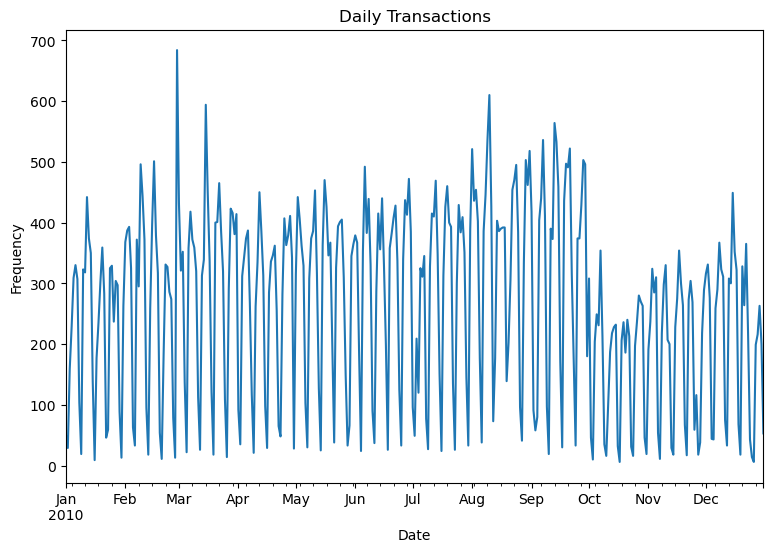

In [286]:
daily_count = data.assign(trx = np.ones(numrecords)).set_index(data['Date']).resample(dt.timedelta(days = 1))\
    .count().trx
daily_count.plot(title = 'Daily Transactions', figsize = (9, 6), xlabel = 'Date', ylabel = 'Frequency')
plt.gcf().set_dpi(100)

<AxesSubplot:title={'center':'Daily Applicationss'}, xlabel='Date'>

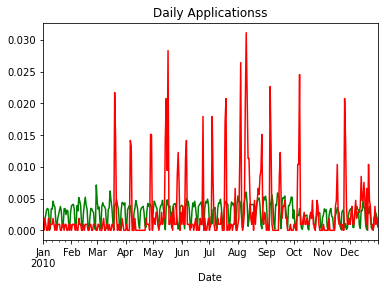

In [278]:
ngoods = len(goods)
nbads = len(bads)
goods_series = goods.assign(trx = np.ones(ngoods)).set_index(goods['Date']).resample(dt.timedelta(days = 1)).count().trx
norm_goods_series = goods_series / ngoods
norm_goods_series.plot(title = 'Daily Applicationss', color = 'green')
bads_series = bads.assign(trx = np.ones(nbads)).set_index(bads['Date']).resample(dt.timedelta(days = 1)).count().trx
norm_bads_series = bads_series / nbads
norm_bads_series.plot(color = 'red')

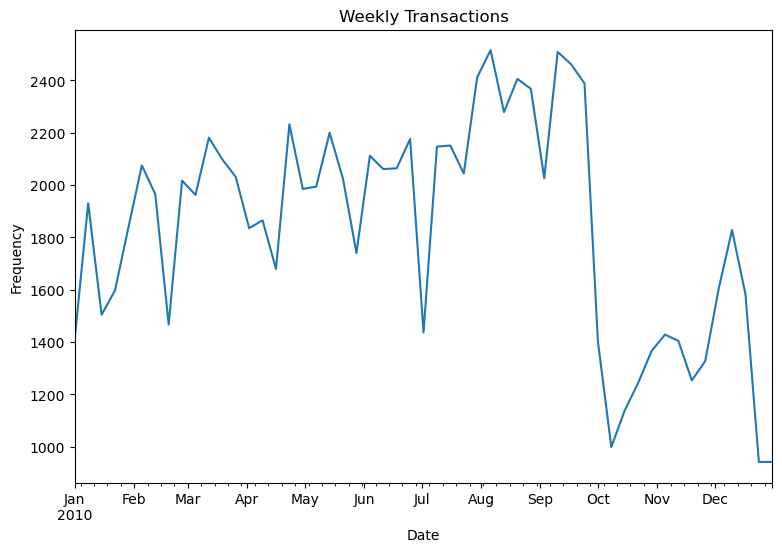

In [300]:
weekly_applications = data.assign(trx = np.ones(numrecords)).set_index(data['Date']).resample(dt.timedelta(days = 7))\
    .count().trx
weekly_applications['2010-12-31'] = weekly_applications['2010-12-24']
weekly_applications.plot(title = 'Weekly Transactions', figsize = (9, 6), xlabel = 'Date', ylabel = 'Frequency')
plt.gcf().set_dpi(100)

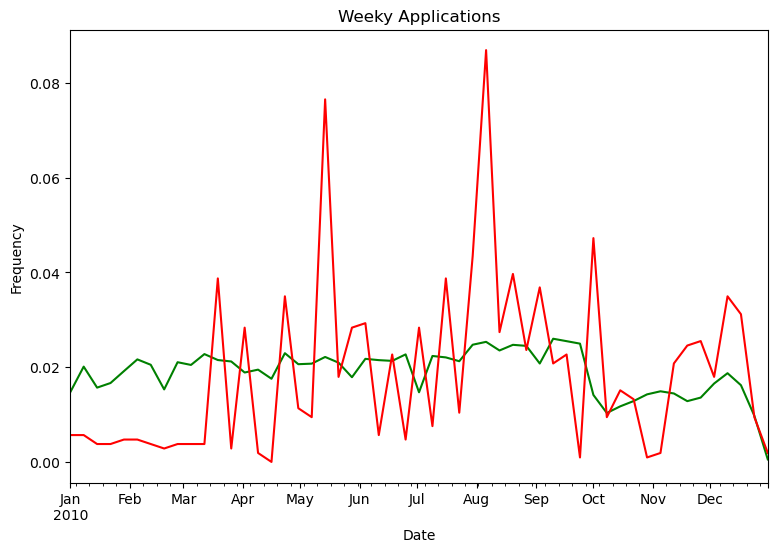

In [293]:
goods_series = goods.assign(trx = np.ones(ngoods)).set_index(goods['Date']).resample(dt.timedelta(days = 7)).count().trx
norm_goods_series = goods_series / ngoods
norm_goods_series.plot(title = 'Weeky Applications', color = 'green')
bads_series = bads.assign(trx = np.ones(nbads)).set_index(bads['Date']).resample(dt.timedelta(days = 7)).count().trx
norm_bads_series = bads_series / nbads
norm_bads_series.plot(color = 'red', figsize = (9, 6), xlabel = 'Date', ylabel = 'Frequency')
plt.gcf().set_dpi(100)

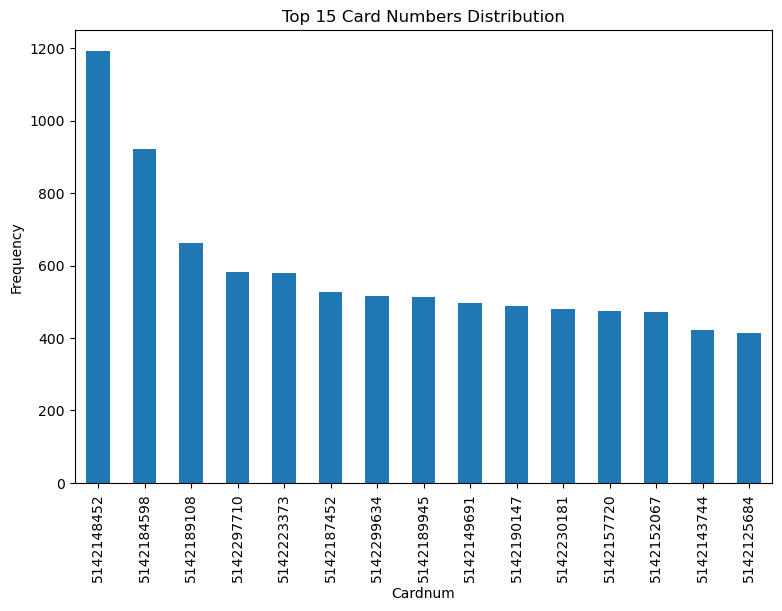

In [152]:
data['Cardnum'].value_counts().head(15).plot(kind='bar',logy=False, xlabel = 'Cardnum', ylabel = 'Frequency',
                                        title = 'Top 15 Card Numbers Distribution', ylim = (0, 1_250),
                                        figsize = (9, 6))
plt.gcf().set_dpi(100)

In [141]:
merchnum15 = data['Merchnum'].value_counts().head(15).reset_index()
merchnum15

,index,Merchnum
0,930090121224,9310
1,,3375
2,5509006296254,2131
3,9900020006406,1714
4,602608969534,1092
5,4353000719908,1020
6,410000971343,982
7,9918000409955,956
8,5725000466504,872
9,9108234610000,817


In [142]:
merchnum15.loc[1,['index']] = ['NaN']
merchnum15 = merchnum15.set_index('index')

In [143]:
data['Merchnum'].isna().sum()

0

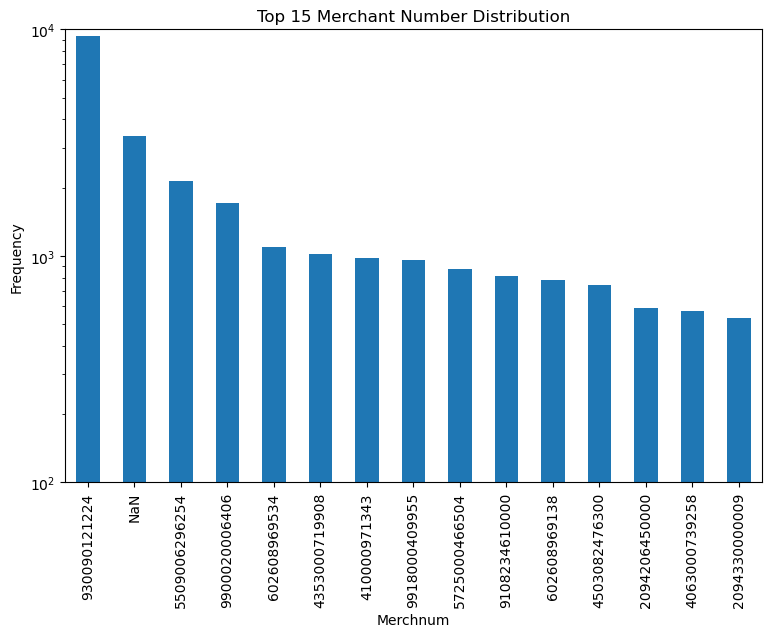

In [165]:
merchnum15.plot(kind='bar',logy = True, xlabel = 'Merchnum', ylabel = 'Frequency',
                title = 'Top 15 Merchant Number Distribution', figsize = (9, 6), ylim = (100, 10_000), legend = False)
plt.gcf().set_dpi(100)

plt.show()

In [166]:
data[data['Merchnum'] == ''].count()

Recnum               3375
Cardnum              3375
Date                 3375
Merchnum             3375
Merch description    3375
Merch state          2302
Merch zip            1847
Transtype            3375
Amount               3375
Fraud                3375
Unnamed: 10             0
Unnamed: 11             0
Unnamed: 12             0
Unnamed: 13             0
Unnamed: 14             0
Unnamed: 15             0
Unnamed: 16             0
Unnamed: 17             0
dtype: int64

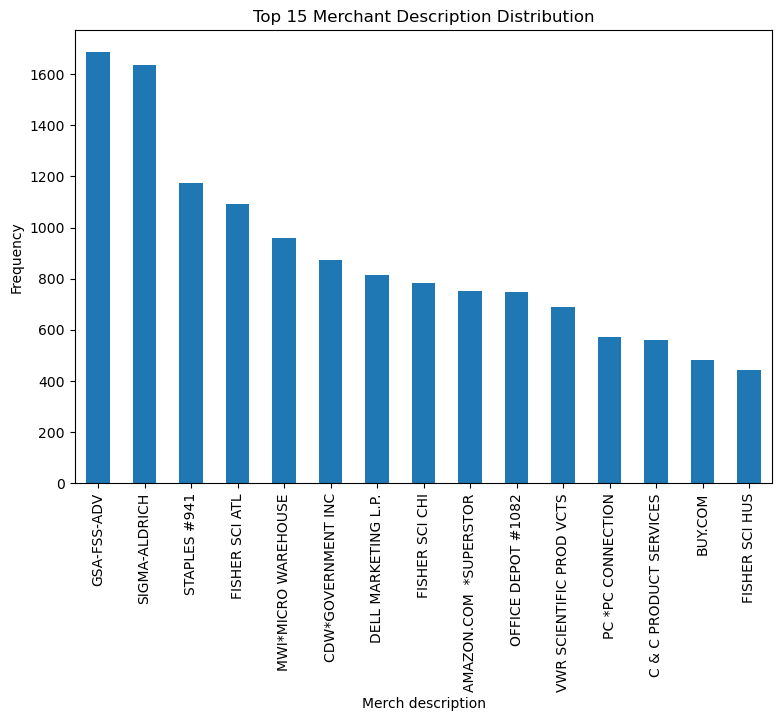

In [164]:
data['Merch description'].value_counts().head(15).plot(kind='bar',logy=False, xlabel = 'Merch description', ylabel = 'Frequency',
                                        title = 'Top 15 Merchant Description Distribution', figsize = (9, 6))
plt.gcf().set_dpi(100)

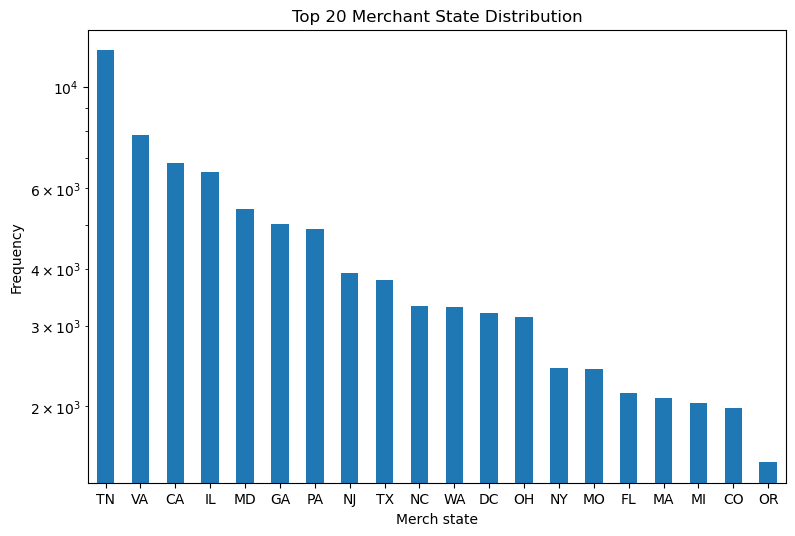

In [163]:
data['Merch state'].value_counts().head(20).plot(kind='bar', logy = True, xlabel = 'Merch state', ylabel = 'Frequency',
                                        title = 'Top 20 Merchant State Distribution', figsize = (9, 6), rot = 360)
plt.gcf().set_dpi(100)

In [199]:
data['Merch zip'] = data['Merch zip'].astype('Int64')
data['Merch zip']

0        38118
1         1803
2        20706
3        38118
4        38118
         ...  
96748    41042
96749    45248
96750    45150
96751    92656
96752     7606
Name: Merch zip, Length: 96753, dtype: Int64

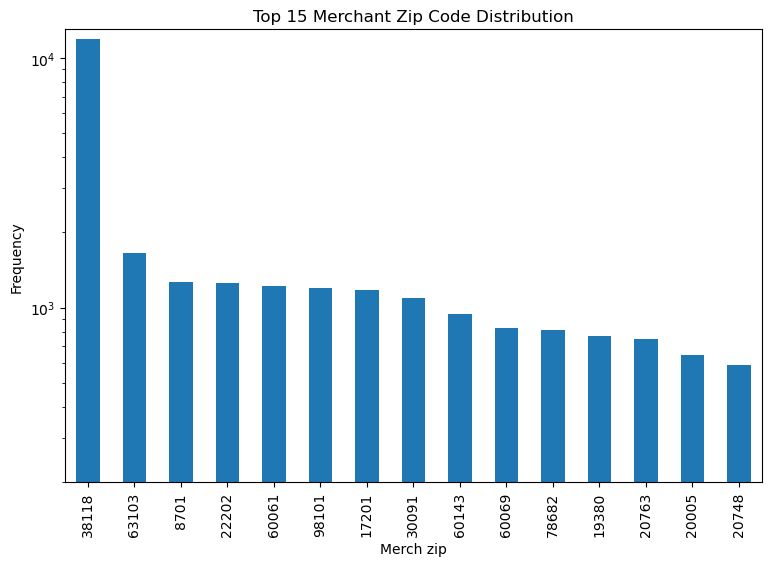

In [200]:
data['Merch zip'].value_counts().head(15).plot(kind='bar',logy=True, xlabel = 'Merch zip', ylabel = 'Frequency',
                                        title = 'Top 15 Merchant Zip Code Distribution', figsize = (9, 6), ylim=(200, 13_000))
plt.gcf().set_dpi(100)

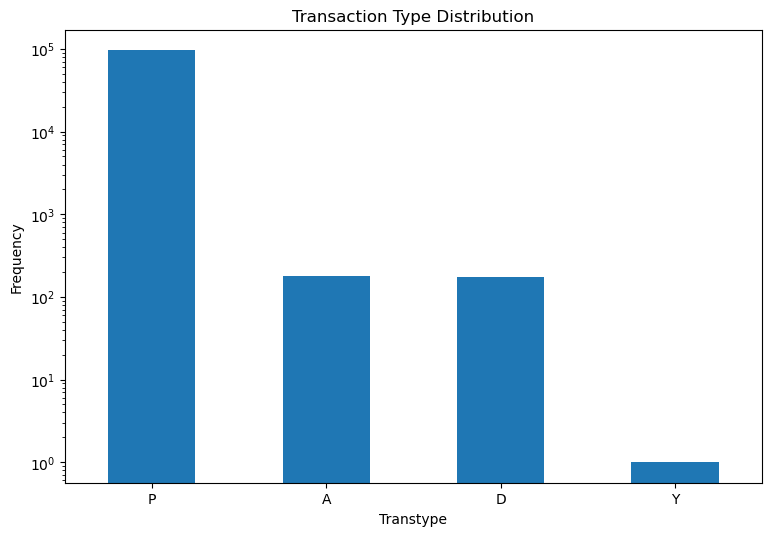

In [208]:
data['Transtype'].value_counts().head().plot(kind='bar',logy=True, xlabel = 'Transtype', ylabel = 'Frequency',
                                        title = 'Transaction Type Distribution', figsize = (9, 6), rot = 360)
plt.gcf().set_dpi(100)

In [218]:
data['Amount'].value_counts()

3.62       4283
3.67       1620
3.74        913
3.80        827
4.37        378
           ... 
949.29        1
2303.00       1
303.72        1
183.36        1
554.64        1
Name: Amount, Length: 34909, dtype: int64

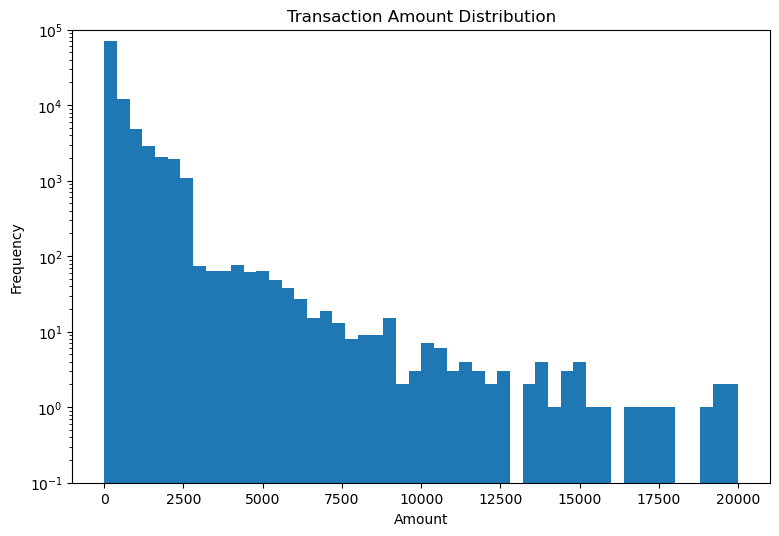

In [276]:
data['Amount'].plot(kind='hist',logy=True,bins = 50, range = [0, 20_000], xlabel = 'Amount', ylabel = 'Frequency',
                                        title = 'Transaction Amount Distribution', figsize = (9, 6), ylim = (.1, 100_000))
plt.gcf().set_dpi(100)
plt.xlabel('Amount')
plt.show()

In [69]:
data['Fraud'].value_counts()

0    95694
1     1059
Name: Fraud, dtype: int64

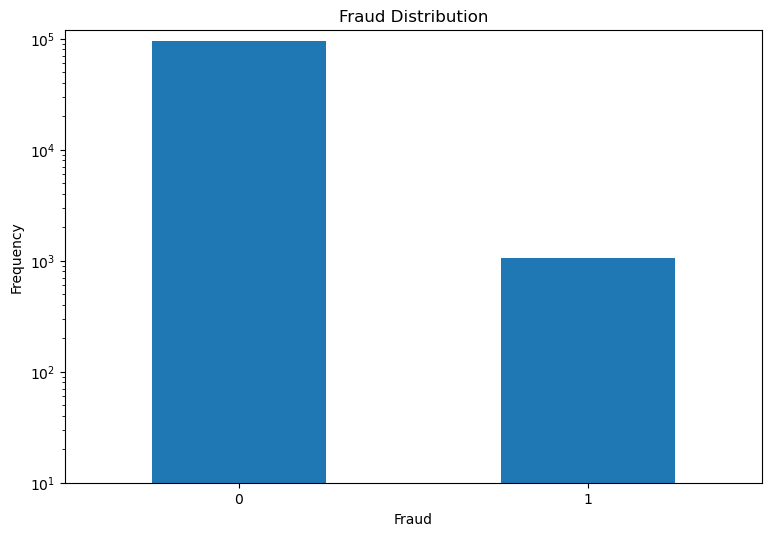

In [84]:
data['Fraud'].value_counts().plot(kind='bar',logy=True, xlabel = 'Fraud', ylabel = 'Frequency',
                                        title = 'Fraud Distribution', figsize = (9, 6), ylim = (10, 120_000) ,rot = 360)
plt.gcf().set_dpi(100)